In [113]:
from Model import Model
from brian2 import*
import functions
import paintapp
from IPython.display import Video, Image
from opencvtry import cvWriter
import parameter_tuning

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Create, Run and Plot
Create the Model.
Run the model for 100 ms.
Plot the voltages of some cells.

## Create the trajectory
With a paint app, we draw the trajectory we want.
First we draw a trajectory by using the "paintapp.py".

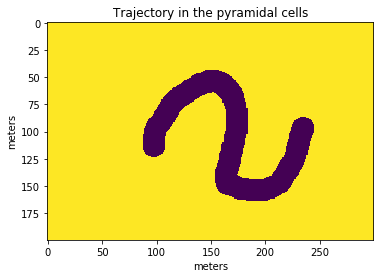

In [114]:
trajectory = paintapp.create_trajectory()

## Exploration of parameters
Explore parameters to find some appropriate one. 

In [115]:
params = {'trajectory' : trajectory,          
          'rec_weight' : 3,
          'ext_weight' : 0.5,
          'noise_weight' : 0.1,
          'R_weight' : 10,
          'inh_weight_pi' : 0.1,
           'inh_weight_ip' : 0.01,
          'tau_dyn_inh' : 10 * ms
         }

    
list_params = [params]

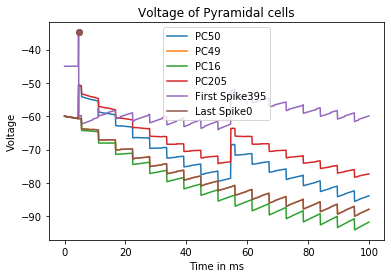

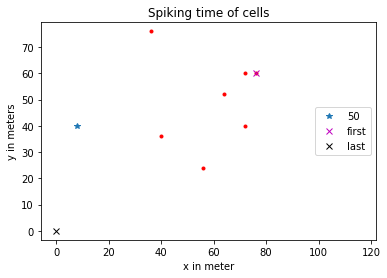

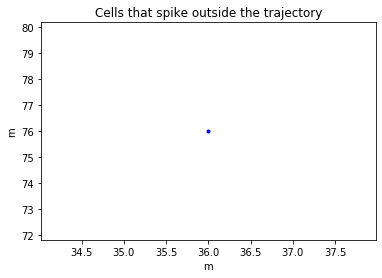

In [116]:
fm1 = functions.plot_run(params, 'FairhallModel')

## Plot the voltage of different cells

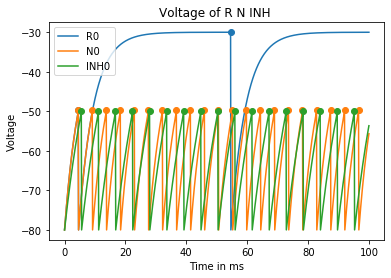

In [117]:
functions.plot_voltages_other_types(fm1)

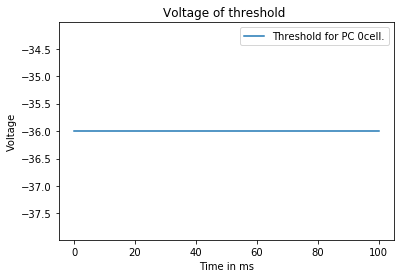

In [118]:
functions.plot_voltages_other_types(fm1, ["threshold"])

## Video of spikes
Video of pyramidal cells and their spike times.

In [119]:
file_path_name, width_, height_ = functions.create_movie(fm1)
video = Video(file_path_name, width=width_, height=height_)
video

## Structure of the network
Plot the connectivity of the cells:
- Reccurrent connectivity
- INH inputs, inhibitory inputs
- N inputs, noise 2 higher in the trajectory
- R inputs, random to break synchronity

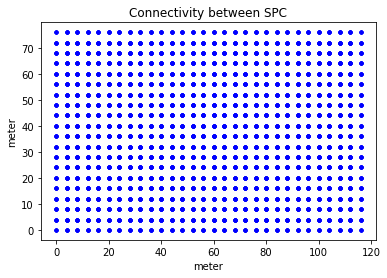

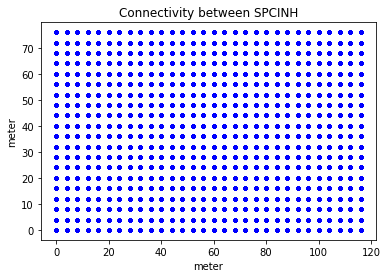

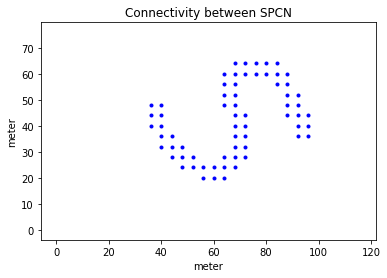

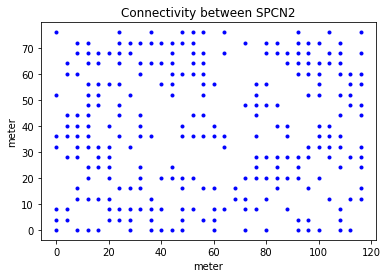

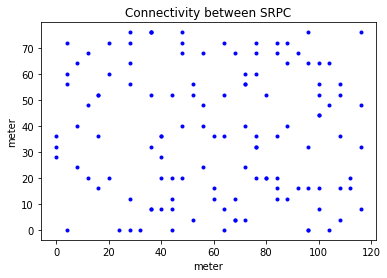

In [120]:
result = functions.plot_all_connectivity(fm1)


## Some tools


## Distribution of parameters
Plot distribtution of certain parameters:
- Weight parameters
- Delay parameters

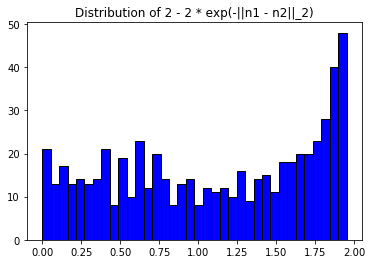

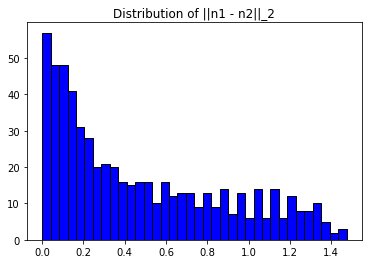

In [111]:
functions.plot_different_distances(fm1)

## Visualise distances
Norm l2 distance.

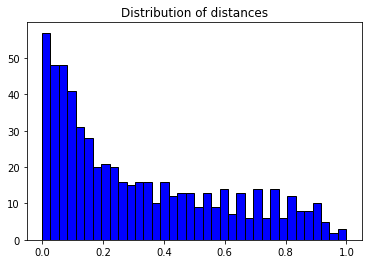

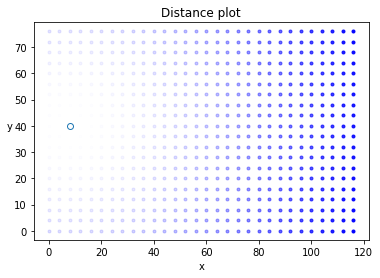

In [207]:
neuron_idx = 50
functions.plot_distance(fm1)

## Parameter exploration
Can explore the different parameters and their consequences.

In [ ]:
for i in range(3):
    print('For model ',i)
    start_scope()
    p = {
            # Tonic Neurons
            "v_reset_tonic" : -80 + i*30,        # Leak potential
            "v_leak_tonic" : -80,         # Reset potential
            "v_thr_tonic" : -50,          # Spiking threshold
            'tau_dyn_tonic': 5 * ms,      # Leak timescale
            "tau_refr_tonic" : 2 * ms,    # Refractory period
            "gi_tonic" : 1,               # ???

            # External Input Neurons
            "v_reset_ext": -80 + i*30,  # Leak potential
            "v_leak_ext": -80,  # Reset potential
            "v_thr_ext": -50,  # Spiking threshold
            'tau_dyn_ext': 5 * ms,  # Leak timescale
            "tau_refr_ext": 2 * ms,  # Refractory period
            "gi_ext": 1,  # ???
    }
    fm1 = FirstModel(p)
    fm1.run(show_other=True)